#### student ID : 20141445

##### import librarys

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import random
import sys
import collections

##### Load image and define constants and label array

In [2]:
image = Image.open('picture3.jpg')
pixels = np.array(image)
height = len(pixels)
width = len(pixels[0])
Ks = [2, 3, 6, 12]

##### rgb vector to rgbxy vector

In [3]:
pixels_xy = np.empty([height, width, 5])
for i in range(height):
    for j in range(width):
        pixels_xy[i][j][0] = pixels[i][j][0]
        pixels_xy[i][j][1] = pixels[i][j][1]
        pixels_xy[i][j][2] = pixels[i][j][2]
        pixels_xy[i][j][3] = i
        pixels_xy[i][j][4] = j
pixels = pixels_xy

##### define functions

##### energy : 
$$ \sum_k \sum_x [ \| f(x) - m_k \|^2 + a * \| x - c_k \|^2 ] $$
where $I(k)$ denotes the index set of $x$ that belongs to cluster $k$, $m_k$ denotes the centroid of image intensity for cluster $k$, $c_k$ denotes the centroid of spatial location for cluster $k$, and a determines the importance between the image intensity and the spatial relation.

In [4]:
def average(pixels):
    N = len(pixels)
    if N == 0: return np.empty([5])
    return np.divide(np.sum(pixels, 0),N)

def distance(one, other, lam):
    #print(lam)
    #print(one[:3])
    #print(one[-2:])
    #print(other[:3])
    #print(other[-2:])
    return np.sum(np.absolute(one[:3] - other[:3])) + (lam * np.sum(np.absolute(one[-2:] - other[-2:])))

def energy(average, pixels, lam):
    return sum(distance(average, pixel, lam) for pixel in pixels)

##### mean, standard deviation

In [5]:
def mean(pixels):
    return np.mean(np.mean(pixels, axis=0), axis=0)

def std(pixels):
    return np.std(pixels.reshape((height*width,5)), axis=0)

##### random labeling

In [6]:
def randomLabeling(labels, K):
    for i in range(height):
        for j in range(width):
            labels[i][j] = random.choice(range(K))

##### make centroids

In [7]:
def makeCentroids(pixels_labeled, K):
    centroids = []
    for k in range(K):
        centroids.append(average(pixels_labeled[k]))
    return centroids

##### make pixels_labeled

In [8]:
def makePixeldsLabeled(pixels, labels, K):
    pixels_labeled = []
    for k in range(K):
        pixels_labeled.append(list())
    for i in range(height):
        for j in range(width):
            pixels_labeled[labels[i][j]].append(pixels[i][j])
    return pixels_labeled

##### labeling based centroid

In [9]:
def labelingBasedCentroid(pixels, labels, centroids, lam):
    for i in range(height):
        for j in range(width):
            min = 255 * 5 + 1
            for k in range(len(centroids)):
                dis = distance(pixels[i][j], centroids[k], lam)
                if min > dis:
                    min = dis
                    labels[i][j] = k

##### make output image

##### Output Image
$$ g(x) = m_c\space where\space label(x) = c $$
Each pixel of the output image $g(x)$ should be its centroid $m_c$ where $c$ is the cluster label of $g(x)$.

In [10]:
def getOutputImage(labels, centroids, rgb_mean, rgb_std):
    output = []
    for i in range(height):
        output.append(list())
        for j in range(width):
            output[i].append(np.divide(np.add(np.multiply(centroids[labels[i][j]][:3], rgb_std), rgb_mean),255))
    return np.array(output)

##### plot energy curve

In [11]:
def calculateEnergy(pixels_labeled, centroids, K, lam):
    result = 0
    for k in range(K):
        result += energy(centroids[k], pixels_labeled[k], lam)
    return result

### preprocessing
#####  - rgb value ([:3]) -> whitening
#####  - xy value([-2:]) -> [0,1] scaling

In [12]:
rgb_mean = mean(pixels)[:3]
rgb_std = std(pixels)[:3]

for i in range(height):
    for j in range(width):
        pixels[i][j][0] = (pixels[i][j][0] - rgb_mean[0])/rgb_std[0]
        pixels[i][j][1] = (pixels[i][j][1] - rgb_mean[1])/rgb_std[1]
        pixels[i][j][2] = (pixels[i][j][2] - rgb_mean[2])/rgb_std[2]
        pixels[i][j][3] = pixels[i][j][3] / height
        pixels[i][j][4] = pixels[i][j][4] / width

##### K-mean clustering

#1  K = 3, lambda = 1 culstering.


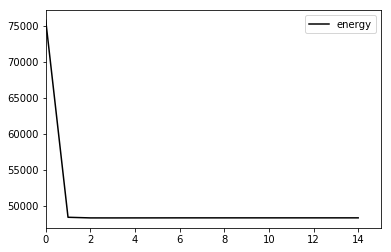

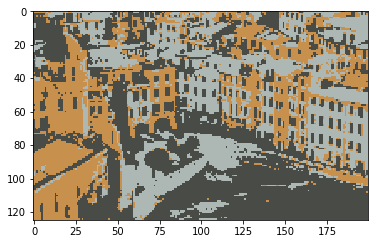

#2  K = 3, lambda = 3 culstering.


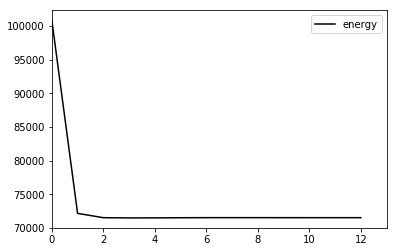

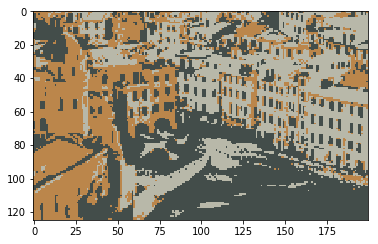

#3  K = 3, lambda = 8 culstering.


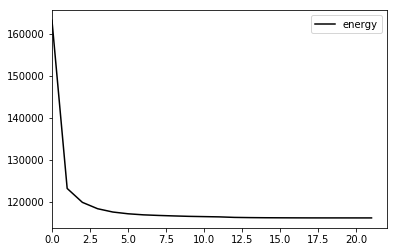

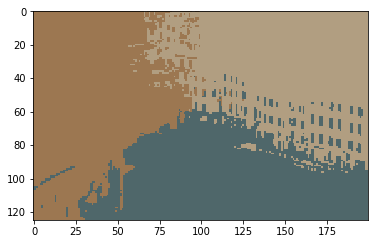

#4  K = 10, lambda = 1 culstering.


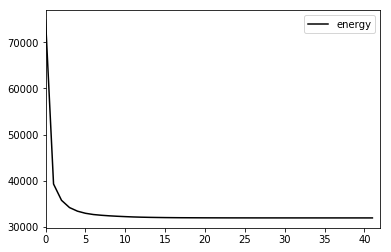

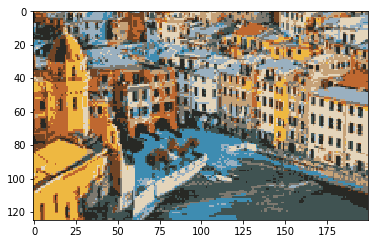

#5  K = 10, lambda = 3 culstering.


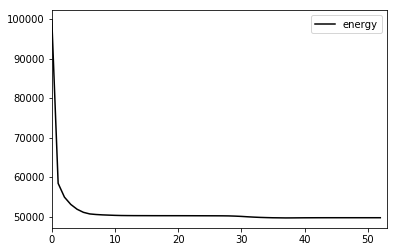

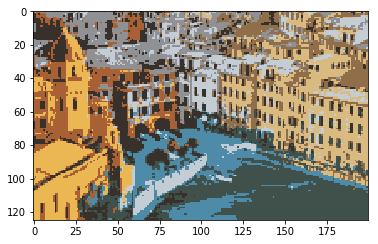

#6  K = 10, lambda = 8 culstering.


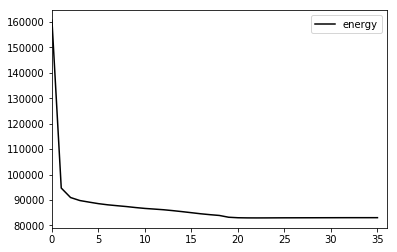

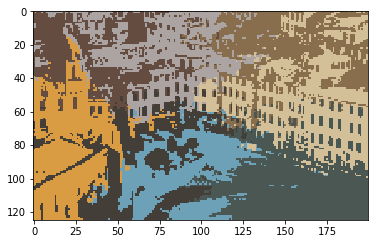

In [13]:
Ks = [3,10]
lams = [1,3,8]
index = 0

for K in Ks:
    for lam in lams:
        index += 1
        print("#" + str(index) + "  K = " + str(K) + ", lambda = " + str(lam) + " culstering.")
        labels = np.empty([height, width], dtype=int)
        before_labels = []
        energies = []
        randomLabeling(labels, K)
        pixels_labeled = makePixeldsLabeled(pixels, labels, K)
        while not np.array_equal(before_labels, labels):
            before_labels = np.array(labels, copy=True)
            centroids = makeCentroids(pixels_labeled, K)
            labelingBasedCentroid(pixels, labels, centroids, lam)
            pixels_labeled = makePixeldsLabeled(pixels, labels, K)
            energies.append(calculateEnergy(pixels_labeled, centroids, K, lam))
        # plot energy curve
        plt.figure()
        plt.xlim(0,len(energies))
        plt.plot(energies,color='black',label='energy')
        plt.legend()
        plt.show()
        # plot output image
        img = getOutputImage(labels, centroids, rgb_mean, rgb_std)
        imgplot = plt.imshow(img)
        plt.show()